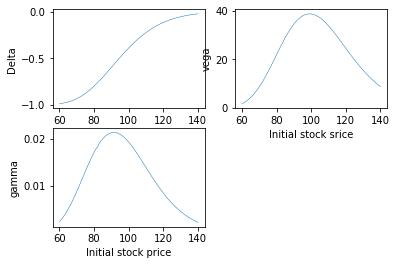

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Prcing by the Integration formula using numerical integration
def BS_Price_Int(S0, r, sigma, T, payoff):
    def integrand(x):
        y = 1 / np.sqrt(2 * np.pi) * payoff(S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * x)) * np.exp(
            -r * T) * np.exp(-x ** 2 / 2)
        return y

    V0 = integrate.quad(integrand, -np.inf, np.inf)[0]
    return V0


def BS_Greeks_num(r, sigma, S0, T, payoff, eps):
    V0 = BS_Price_Int(S0, r, sigma, T, payoff)
    V_Delta = BS_Price_Int((1 + eps) * S0, r, sigma, T, payoff)
    V_vega = BS_Price_Int(S0, r, (1 + eps) * sigma, T, payoff)
    V_gamma1 = V_Delta
    V_gamma2 = BS_Price_Int((1 - eps) * S0, r, sigma, T, payoff)


    Delta = (V_Delta - V0) / (eps * S0)
    vega = (V_vega - V0) / (eps * sigma)
    gamma = (V_gamma1 - 2 * V0 + V_gamma2) / ((eps * S0) ** 2)
    return [V0, Delta, vega, gamma]


# test parameters
r = 0.03
sigma = 0.2
T =1
eps = 0.01
K = 100
S0 = range(60,141)

def payoff(x):
    y = np.maximum(K - x, 0)
    return y


Delta = np.zeros(141)
vega = np.zeros(141)
gamma = np.zeros(141)


for i in S0:
    Delta[i] = BS_Greeks_num(r, sigma, S0=i, T=T, payoff=payoff, eps=eps)[1]
    vega[i] = BS_Greeks_num(r, sigma, S0=i, T=T, payoff=payoff, eps=eps)[2]
    gamma[i] = BS_Greeks_num(r, sigma, S0=i, T=T, payoff=payoff, eps=eps)[3]

x = np.arange(1, 141)

# visualization of first 3 greeks given a constant strike price of K = 100:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x[60-1:141], Delta[60:141], linewidth = 0.5)
plt.xlabel("Initial stock price")
plt.ylabel("Delta")

plt.subplot(2, 2, 2)
plt.plot(x[60-1:141], vega[60:141], linewidth = 0.5)
plt.xlabel("Initial stock srice")
plt.ylabel("vega")

plt.subplot(2, 2, 3)
plt.plot(x[60-1:141], gamma[60:141], linewidth = 0.5)
plt.xlabel("Initial stock price")
plt.ylabel("gamma")

plt.show()
